## 实例37：卷积函数的使用

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf  

# 1. 定义输入变量
# [batch, in_height, in_width, in_channels] [训练时一个batch的图片数量, 图片高度, 图片宽度, 图像通道数]  
input = tf.Variable(tf.constant(1.0,shape = [1, 5, 5, 1])) 
input2 = tf.Variable(tf.constant(1.0,shape = [1, 5, 5, 2]))
input3 = tf.Variable(tf.constant(1.0,shape = [1, 4, 4, 1])) 

# 2. 定义卷积核变量
# [filter_height, filter_width, in_channels, out_channels] [卷积核的高度，卷积核的宽度，图像通道数，卷积核个数]   
filter1 =  tf.Variable(tf.constant([-1.0,0,0,-1],shape = [2, 2, 1, 1]))
filter2 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 1, 2])) 
filter3 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 1, 3])) 
filter4 =  tf.Variable(tf.constant([-1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1],shape = [2, 2, 2, 2])) 
filter5 =  tf.Variable(tf.constant([-1.0,0,0,-1,-1.0,0,0,-1],shape = [2, 2, 2, 1])) 


# 3. 定义卷积操作
# padding的值为‘VALID’，表示边缘不填充, 当其为‘SAME’时，表示填充到卷积核可以到达图像边缘  
op1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成1个feature ma
op2 = tf.nn.conv2d(input, filter2, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成2个feature map
op3 = tf.nn.conv2d(input, filter3, strides=[1, 2, 2, 1], padding='SAME') #1个通道输入，生成3个feature map

op4 = tf.nn.conv2d(input2, filter4, strides=[1, 2, 2, 1], padding='SAME') # 2个通道输入，生成2个feature
op5 = tf.nn.conv2d(input2, filter5, strides=[1, 2, 2, 1], padding='SAME') # 2个通道输入，生成一个feature map

vop1 = tf.nn.conv2d(input, filter1, strides=[1, 2, 2, 1], padding='VALID') # 5*5 对于pading不同而不同
op6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='SAME') 
vop6 = tf.nn.conv2d(input3, filter1, strides=[1, 2, 2, 1], padding='VALID')  #4*4与pading无关
  

# 4. 运行卷积操作
init = tf.global_variables_initializer()  
with tf.Session() as sess:  
    sess.run(init)  
    
    print("op1:\n",sess.run([op1,filter1]))#1-1  后面补0
    print("------------------")
    
    print("op2:\n",sess.run([op2,filter2])) #1-2多卷积核 按列取
    print("op3:\n",sess.run([op3,filter3])) #1-3
    print("------------------")   
    
    print("op4:\n",sess.run([op4,filter4]))#2-2    通道叠加
    print("op5:\n",sess.run([op5,filter5]))#2-1        
    print("------------------")
  
    print("op1:\n",sess.run([op1,filter1]))#1-1
    print("vop1:\n",sess.run([vop1,filter1]))
    print("op6:\n",sess.run([op6,filter1]))
    print("vop6:\n",sess.run([vop6,filter1]))    

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
op1:
 [array([[[[-2.],
         [-2.],
         [-1.]],

        [[-2.],
         [-2.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.]]]], dtype=float32), array([[[[-1.]],

        [[ 0.]]],


       [[[ 0.]],

        [[-1.]]]], dtype=float32)]
------------------
op2:
 [array([[[[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-2., -2.],
         [-2., -2.],
         [-2.,  0.]],

        [[-1., -1.],
         [-1., -1.],
         [-1.,  0.]]]], dtype=float32), array([[[[-1.,  0.]],

        [[ 0., -1.]]],


       [[[-1.,  0.]],

        [[ 0., -1.]]]], dtype=float32)]
op3:
 [array([[[[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -2., -2.],
         [-2., -2., -2.],
         [-1., -1., -1.]],

        [[-2., -1.,  0.],
         [-2., -1.,  0.],
         [-1.,  0.,  0.]]]], dtype=float32), array([[[[-1.,  0.,  0.]],

        [[-1., -1.,  0

## 实例38：使用卷积提取图片的轮廓（sobel算子）

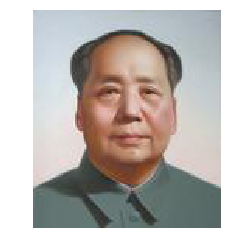

(140, 121, 3)


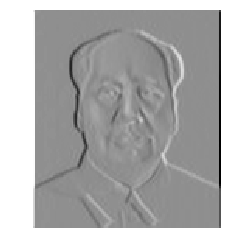

In [5]:
# -*- coding: utf-8 -*-

# 1. 载入图片并显示
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
import tensorflow as tf  

myimg = mpimg.imread('img.jpg') # 读取和代码处于同一目录下的图片
plt.imshow(myimg) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
print(myimg.shape)

# 2. 定义占位符、卷积核、卷积op
full=np.reshape(myimg,[1, 140, 121, 3])  
inputfull = tf.Variable(tf.constant(1.0,shape = [1, 140, 121, 3]))

filter =  tf.Variable(tf.constant([[-1.0,-1.0,-1.0],  [0,0,0],  [1.0,1.0,1.0],
                                    [-2.0,-2.0,-2.0], [0,0,0],  [2.0,2.0,2.0],
                                    [-1.0,-1.0,-1.0], [0,0,0],  [1.0,1.0,1.0]],shape = [3, 3, 3, 1]))                                    

op = tf.nn.conv2d(inputfull, filter, strides=[1, 1, 1, 1], padding='SAME') #3个通道输入，生成1个feature ma
o=tf.cast(  ((op-tf.reduce_min(op))/(tf.reduce_max(op)-tf.reduce_min(op)) ) *255 ,tf.uint8)


# 3. 运行卷积操作并显示
with tf.Session() as sess:  
    sess.run(tf.global_variables_initializer()  )  

    t,f=sess.run([o,filter],feed_dict={ inputfull:full})
    #print(f)
    t=np.reshape(t,[140, 121]) 
 
    plt.imshow(t,cmap='Greys_r') # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()

## 实例39：池化函数的使用

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf  

# 1. 定义输入变量 (input, ksize, strides, padding, name = None)
img=tf.constant([  
        [[0.0,4.0],[0.0,4.0],[0.0,4.0],[0.0,4.0]],  
        [[1.0,5.0],[1.0,5.0],[1.0,5.0],[1.0,5.0]],  
        [[2.0,6.0],[2.0,6.0],[2.0,6.0],[2.0,6.0]],  
        [[3.0,7.0],[3.0,7.0], [3.0,7.0],[3.0,7.0]]
    ])  
  
img=tf.reshape(img,[1,4,4,2])  

# 2. 定义池化操作
pooling=tf.nn.max_pool(img,[1,2,2,1],[1,2,2,1],padding='VALID')  
pooling1=tf.nn.max_pool(img,[1,2,2,1],[1,1,1,1],padding='VALID')
pooling2=tf.nn.avg_pool(img,[1,4,4,1],[1,1,1,1],padding='SAME')  
pooling3=tf.nn.avg_pool(img,[1,4,4,1],[1,4,4,1],padding='SAME') 
nt_hpool2_flat = tf.reshape(tf.transpose(img), [-1, 16]) 
pooling4=tf.reduce_mean(nt_hpool2_flat,1) #1对行求均值（1表示轴是列）   0 对列求均值

# 3. 运行池化操作
with tf.Session() as sess:  
    print("image:")  
    image=sess.run(img)  
    print (image)  
    result=sess.run(pooling)  
    print ("reslut:\n",result)  
    result=sess.run(pooling1)  
    print ("reslut1:\n",result)     
    result=sess.run(pooling2)  
    print ("reslut2:\n",result)
    result=sess.run(pooling3)  
    print ("reslut3:\n",result) 
    flat,result=sess.run([nt_hpool2_flat,pooling4])  
    print ("reslut4:\n",result) 
    print("flat:\n",flat)     

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


image:
[[[[0. 4.]
   [0. 4.]
   [0. 4.]
   [0. 4.]]

  [[1. 5.]
   [1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]
   [3. 7.]]]]
reslut:
 [[[[1. 5.]
   [1. 5.]]

  [[3. 7.]
   [3. 7.]]]]
reslut1:
 [[[[1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]]]]
reslut2:
 [[[[1.  5. ]
   [1.  5. ]
   [1.  5. ]
   [1.  5. ]]

  [[1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]
   [1.5 5.5]]

  [[2.  6. ]
   [2.  6. ]
   [2.  6. ]
   [2.  6. ]]

  [[2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]
   [2.5 6.5]]]]
reslut3:
 [[[[1.5 5.5]]]]
reslut4:
 [1.5 5.5]
flat:
 [[0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3. 0. 1. 2. 3.]
 [4. 5. 6. 7. 4. 5. 6. 7. 4. 5. 6. 7. 4. 5. 6. 7.]]


## 实例40：导入并显示CIFAR数据集

In [2]:
# -*- coding: utf-8 -*-

#放在cifar目录下
import cifar10

cifar10.maybe_download_and_extract(data_dir="H:/tensorflow_projects/chap8/")
# -*- coding: utf-8 -*-

>>Downloading cifar-10-binary.tar.gz 100.0%
Successfully down loaded cifar-10-binary.tar.gz 170052171 bytes.


C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.FixedLe

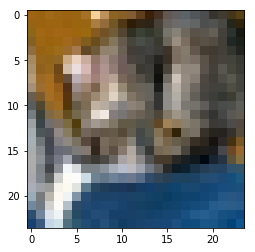

In [1]:
#放在cifar目录下
import cifar10_input
import tensorflow as tf
import pylab 
import numpy as np

#取数据
batch_size = 12
data_dir = 'H:/tensorflow_projects/chap8/cifar-10-batches-bin'
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)


#sess = tf.InteractiveSession()
#tf.global_variables_initializer().run()
#tf.train.start_queue_runners()
#image_batch, label_batch = sess.run([images_test, labels_test])
#print("__\n",image_batch[0])
#
#print("__\n",label_batch[0])
#pylab.imshow(image_batch[0])
#pylab.show()
#

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)
tf.train.start_queue_runners(sess=sess)
image_batch, label_batch = sess.run([images_test, labels_test])
print("__\n",image_batch[0])

print("__\n",label_batch[0])
pylab.imshow(  (image_batch[0]-np.min(image_batch[0]))  / (np.max(image_batch[0])-np.min(image_batch[0]) )   )
pylab.show()

#with tf.Session() as sess:
#    tf.global_variables_initializer().run()
#    tf.train.start_queue_runners()
#    image_batch, label_batch = sess.run([images_test, labels_test])
#    print("__\n",image_batch[0])
#    
#    print("__\n",label_batch[0])
#    pylab.imshow(image_batch[0])
#    pylab.show()


## 实例41：显示CIFAR数据集的原始图片

3


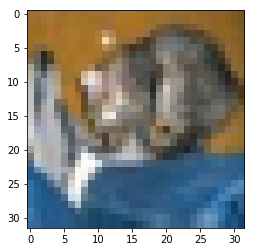

In [10]:
# -*- coding: utf-8 -*-
import numpy as np  
from scipy.misc import imsave  
  
filename = '../cifar-10-batches-bin/test_batch.bin'  
  
bytestream = open(filename, "rb")  
buf = bytestream.read(10000 * (1 + 32 * 32 * 3))  
bytestream.close()  
  
data = np.frombuffer(buf, dtype=np.uint8)  
data = data.reshape(10000, 1 + 32*32*3)  
labels_images = np.hsplit(data, [1])  
labels = labels_images[0].reshape(10000)  
images = labels_images[1].reshape(10000, 32, 32, 3)  
  
img = np.reshape(images[0], (3, 32, 32)) #导出第一幅图  
img = img.transpose(1, 2, 0)  
  
import pylab 
print(labels[0]) 
pylab.imshow(img)
pylab.show()

In [15]:
# -*- coding: utf-8 -*-
import tensorflow as tf  

#创建长度为100的队列  
queue = tf.FIFOQueue(100,"float")  

c = tf.Variable(0.0)  #计数器  
#加1操作 
op = tf.assign_add(c,tf.constant(1.0))  
#操作:将计数器的结果加入队列  
enqueue_op = queue.enqueue(c)  
  
#创建一个队列管理器QueueRunner，用这两个操作向q中添加元素。目前我们只使用一个线程:  
qr = tf.train.QueueRunner(queue,enqueue_ops=[op,enqueue_op]) 

with tf.Session() as sess:  
    sess.run(tf.global_variables_initializer())  
       
    coord = tf.train.Coordinator()  
      
    ## 启动入队线程, Coordinator是线程的参数  
    enqueue_threads = qr.create_threads(sess, coord = coord,start=True)  # 启动入队线程  
      
    # 主线程  
    for i in range(0, 10):  
        print ("-------------------------")  
        print(sess.run(queue.dequeue()))  
      
     
    coord.request_stop()  #通知其他线程关闭 其他所有线程关闭之后，这一函数才能返回  


    #join操作经常用在线程当中,其作用是等待某线程结束  
    #coord.join(enqueue_threads) 



-------------------------
2.0
-------------------------
3.0
-------------------------
3.0
-------------------------
4.0
-------------------------
5.0
-------------------------
6.0
-------------------------
7.0
-------------------------
7.0
-------------------------
9.0
-------------------------
9.0


## 实例42：协调器的用法演示

In [14]:
# -*- coding: utf-8 -*-
#放在cifar目录下
import  cifar10_input
import tensorflow as tf
import pylab 

#取数据
batch_size = 12
data_dir = '../cifar-10-batches-bin'
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)


with tf.Session() as sess:
    tf.global_variables_initializer().run()

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess, coord)
    
    image_batch, label_batch = sess.run([images_test, labels_test])
    print("__\n",image_batch[0])
    
    print("__\n",label_batch[0])
    pylab.imshow(image_batch[0])
    pylab.show()
    coord.request_stop()

__
 [[[ 1.0754309   1.0754309   1.0754309 ]
  [ 1.0754309   1.0754309   1.0754309 ]
  [ 1.0754309   1.0754309   1.0754309 ]
  ...
  [ 1.0754309   1.0754309   1.0754309 ]
  [ 1.0754309   1.0754309   1.0754309 ]
  [ 1.0754309   1.0754309   1.0754309 ]]

 [[ 1.088781    1.0754309   1.0754309 ]
  [ 1.088781    1.0754309   1.0754309 ]
  [ 1.0754309   1.088781    1.0754309 ]
  ...
  [ 1.088781    1.088781    1.0754309 ]
  [ 1.088781    1.088781    1.0754309 ]
  [ 1.088781    1.088781    1.0754309 ]]

 [[ 1.0620806   1.0353804   1.0487305 ]
  [ 1.1021312   1.088781    1.088781  ]
  [ 1.1021312   1.1021312   1.0754309 ]
  ...
  [ 1.088781    1.1021312   1.0620806 ]
  [ 1.0754309   1.088781    1.0487305 ]
  [ 1.0754309   1.0754309   1.0754309 ]]

 ...

 [[-1.9016584  -1.9817594  -1.9684093 ]
  [-1.6613551  -1.9016584  -1.8349075 ]
  [-1.6346549  -1.9016584  -1.8349075 ]
  ...
  [-0.6734422  -0.82029414 -0.887045  ]
  [-0.43313903 -0.48653972 -0.5532906 ]
  [-0.3396878  -0.29963726 -0.3797383 ]]

ValueError: Floating point image RGB values must be in the 0..1 range.

## 实例44：建立一个带有全局平均池化层的卷积神经网络

In [17]:
# -*- coding: utf-8 -*-
import cifar10_input
import tensorflow as tf
import numpy as np

# 1. 引入数据集
batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(
    eval_data=False, data_dir=data_dir, batch_size=batch_size)
images_test, labels_test = cifar10_input.inputs(
    eval_data=True, data_dir=data_dir, batch_size=batch_size)
print("begin data")

# 2. 定义网络结构


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):


return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


def avg_pool_6x6(x):


return tf.nn.avg_pool(x, ksize=[1, 6, 6, 1],
                      strides=[1, 6, 6, 1], padding='SAME')

# tf Graph Input
# cifar data image of shape 24*24*3
x = tf.placeholder(tf.float32, [None, 24, 24, 3])
y = tf.placeholder(tf.float32, [None, 10])  # 0-9 数字=> 10 classes


W_conv1 = weight_variable([5, 5, 3, 64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1, 24, 24, 3])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 64, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3 = avg_pool_6x6(h_conv3)  # 10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv = tf.nn.softmax(nt_hpool3_flat)

cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 3. 运行session进行训练
sess = tf.Session()
sess.run(tf.global_variables_initializer())
tf.train.start_queue_runners(sess=sess)
for i in range(15000):
    # 20000
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10, dtype=float)[label_batch]  # one hot

    train_step.run(feed_dict={x: image_batch, y: label_b}, session=sess)

    if i % 200 == 0:
        train_accuracy = accuracy.eval(
            feed_dict={x: image_batch, y: label_b}, session=sess)
    print("step %d, training accuracy %g" % (i, train_accuracy))

# 4. 评估结果
image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10, dtype=float)[label_batch]  # one hot
print("finished！ test accuracy %g" % accuracy.eval(feed_dict={
    x: image_batch, y: label_b}, session=sess))

begin
begin data
step 0, training accuracy 0.164062
step 200, training accuracy 0.320312
step 400, training accuracy 0.414062
step 600, training accuracy 0.4375
step 800, training accuracy 0.429688
step 1000, training accuracy 0.507812
step 1200, training accuracy 0.367188
step 1400, training accuracy 0.523438
step 1600, training accuracy 0.507812
step 1800, training accuracy 0.445312
step 2000, training accuracy 0.5625
step 2200, training accuracy 0.5
step 2400, training accuracy 0.507812
step 2600, training accuracy 0.460938
step 2800, training accuracy 0.585938
step 3000, training accuracy 0.617188
step 3200, training accuracy 0.554688
step 3400, training accuracy 0.546875
step 3600, training accuracy 0.554688
step 3800, training accuracy 0.523438
step 4000, training accuracy 0.554688
step 4200, training accuracy 0.59375
step 4400, training accuracy 0.546875
step 4600, training accuracy 0.601562
step 4800, training accuracy 0.625
step 5000, training accuracy 0.554688
step 5200, trai

## MNIST卷积和CIFAR卷积分类

In [18]:
# -*- coding: utf-8 -*-
import tensorflow as tf
# 导入 MINST 数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
def avg_pool_7x7(x):
    return tf.nn.avg_pool(x, ksize=[1, 7, 7, 1],
                        strides=[1, 7, 7, 1], padding='SAME')

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes



W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#########################################################new
W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_7x7(h_conv3)#64
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)


cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(200):#20000
        batch = mnist.train.next_batch(50)#50
        if i%20 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x:batch[0], y: batch[1]})
            print( "step %d, training accuracy %g"%(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y: batch[1]})
    
    print ("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y: mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
step 0, training accuracy 0.26
step 20, training accuracy 0.14
step 40, training accuracy 0.14
step 60, training accuracy 0.26
step 80, training accuracy 0.18
step 100, training accuracy 0.22
step 120, training accuracy 0.22
step 140, training accuracy 0.3
step 160, training accuracy 0.12
step 180, training accuracy 0.3

In [1]:
# -*- coding: utf-8 -*-
import  cifar10_input
import tensorflow as tf
import numpy as np


batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(eval_data = False,data_dir = data_dir, batch_size = batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)
print("begin data")



def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
                        
def avg_pool_6x6(x):
    return tf.nn.avg_pool(x, ksize=[1, 6, 6, 1],
                        strides=[1, 6, 6, 1], padding='SAME')

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 24,24,3]) # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes


W_conv1 = weight_variable([5, 5, 3, 64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,24,24,3])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 64, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


keep_prob = tf.placeholder("float")
W_fc1 = weight_variable([6 * 6 * 64, 256])
b_fc1 = bias_variable([256])

h_pool2_flat = tf.reshape(h_pool2, [-1, 6*6*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([256, 128])
b_fc2 = bias_variable([128])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

W_fc3 = weight_variable([128, 10])
b_fc3 = bias_variable([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc2, W_fc3) + b_fc3)


cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

#不同的优化方法测测效果
#train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(cross_entropy)
#train_step = tf.train.AdagradOptimizer(1e-5).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
sess.run(tf.global_variables_initializer())
tf.train.start_queue_runners(sess=sess)
for i in range(15000):#20000
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10,dtype=float)[label_batch] #one hot
  
    train_step.run(feed_dict={x:image_batch, y: label_b, keep_prob: 0.5},session=sess)
  
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:image_batch, y: label_b, keep_prob: 1.0},session=sess)
        print( "step %d, training accuracy %g"%(i, train_accuracy))


image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10,dtype=float)[label_batch]#one hot
print ("finished！ test accuracy %g"%accuracy.eval(feed_dict={
     x:image_batch, y: label_b, keep_prob: 1.0},session=sess))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


begin
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.F

## 实例45：演示反卷积操作

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import tensorflow as tf 

img = tf.Variable(tf.constant(1.0,shape = [1, 4, 4, 1])) 

filter =  tf.Variable(tf.constant([1.0,0,-1,-2],shape = [2, 2, 1, 1]))

conv = tf.nn.conv2d(img, filter, strides=[1, 2, 2, 1], padding='VALID')  
cons = tf.nn.conv2d(img, filter, strides=[1, 2, 2, 1], padding='SAME')
print(conv.shape)
print(cons.shape)
 
contv= tf.nn.conv2d_transpose(conv, filter, [1,4,4,1],strides=[1, 2, 2, 1], padding='VALID')
conts = tf.nn.conv2d_transpose(cons, filter, [1,4,4,1],strides=[1, 2, 2, 1], padding='SAME')
 
with tf.Session() as sess:  
    sess.run(tf.global_variables_initializer() )  

    print("conv:\n",sess.run([conv,filter])) 
    print("cons:\n",sess.run([cons]))    
    print("contv:\n",sess.run([contv])) 
    print("conts:\n",sess.run([conts]))

(1, 2, 2, 1)
(1, 2, 2, 1)
conv:
 [array([[[[-2.],
         [-2.]],

        [[-2.],
         [-2.]]]], dtype=float32), array([[[[ 1.]],

        [[ 0.]]],


       [[[-1.]],

        [[-2.]]]], dtype=float32)]
cons:
 [array([[[[-2.],
         [-2.]],

        [[-2.],
         [-2.]]]], dtype=float32)]
contv:
 [array([[[[-2.],
         [ 0.],
         [-2.],
         [ 0.]],

        [[ 2.],
         [ 4.],
         [ 2.],
         [ 4.]],

        [[-2.],
         [ 0.],
         [-2.],
         [ 0.]],

        [[ 2.],
         [ 4.],
         [ 2.],
         [ 4.]]]], dtype=float32)]
conts:
 [array([[[[-2.],
         [ 0.],
         [-2.],
         [ 0.]],

        [[ 2.],
         [ 4.],
         [ 2.],
         [ 4.]],

        [[-2.],
         [ 0.],
         [-2.],
         [ 0.]],

        [[ 2.],
         [ 4.],
         [ 2.],
         [ 4.]]]], dtype=float32)]


## 实例46：演示反池化操作

In [3]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np


def max_pool_with_argmax(net, stride):
    _, mask = tf.nn.max_pool_with_argmax(net, ksize=[1, stride, stride, 1], strides=[1, stride, stride, 1], padding='SAME')
    mask = tf.stop_gradient(mask)
    net = tf.nn.max_pool(net, ksize=[1, stride, stride, 1],strides=[1, stride, stride, 1], padding='SAME') 
    return net, mask
 

def unpool(net, mask, stride):
    ksize = [1, stride, stride, 1]
    input_shape = net.get_shape().as_list()
    #  calculation new shape
    output_shape = (input_shape[0], input_shape[1] * ksize[1], input_shape[2] * ksize[2], input_shape[3])
    # calculation indices for batch, height, width and feature maps
    one_like_mask = tf.ones_like(mask)
    batch_range = tf.reshape(tf.range(output_shape[0], dtype=tf.int64), shape=[input_shape[0], 1, 1, 1])
    b = one_like_mask * batch_range
    y = mask // (output_shape[2] * output_shape[3])
    x = mask % (output_shape[2] * output_shape[3]) // output_shape[3]
    feature_range = tf.range(output_shape[3], dtype=tf.int64)
    f = one_like_mask * feature_range
    # transpose indices & reshape update values to one dimension
    updates_size = tf.size(net)
    indices = tf.transpose(tf.reshape(tf.stack([b, y, x, f]), [4, updates_size]))
    values = tf.reshape(net, [updates_size])
    ret = tf.scatter_nd(indices, values, output_shape)
    return ret
    
    
img=tf.constant([  
        [[0.0,4.0],[0.0,4.0],[0.0,4.0],[0.0,4.0]],  
        [[1.0,5.0],[1.0,5.0],[1.0,5.0],[1.0,5.0]],  
        [[2.0,6.0],[2.0,6.0],[2.0,6.0],[2.0,6.0]],  
        [[3.0,7.0],[3.0,7.0], [3.0,7.0],[3.0,7.0]]
    ])  
  
img=tf.reshape(img,[1,4,4,2])  
pooling2=tf.nn.max_pool(img,[1,2,2,1],[1,2,2,1],padding='SAME')  
encode, mask = max_pool_with_argmax(img, 2)
img2 = unpool(encode,mask,2)
print(img.shape)
print(encode.shape)
print(mask.shape)
print(img2.shape)
with tf.Session() as sess:  
    print("image:")  
    print (sess.run(img))     
    result=sess.run(pooling2)  
    print ("pooling2:\n",result)
    result,mask2=sess.run([encode, mask])  
    print ("encode:\n",result,mask2)
    result=sess.run(img2)  
    print ("reslut:\n",result)

(1, 4, 4, 2)
(1, 2, 2, 2)
(1, 2, 2, 2)
(1, 4, 4, 2)
image:
[[[[0. 4.]
   [0. 4.]
   [0. 4.]
   [0. 4.]]

  [[1. 5.]
   [1. 5.]
   [1. 5.]
   [1. 5.]]

  [[2. 6.]
   [2. 6.]
   [2. 6.]
   [2. 6.]]

  [[3. 7.]
   [3. 7.]
   [3. 7.]
   [3. 7.]]]]
pooling2:
 [[[[1. 5.]
   [1. 5.]]

  [[3. 7.]
   [3. 7.]]]]
encode:
 [[[[1. 5.]
   [1. 5.]]

  [[3. 7.]
   [3. 7.]]]] [[[[ 8  9]
   [12 13]]

  [[24 25]
   [28 29]]]]
reslut:
 [[[[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[1. 5.]
   [0. 0.]
   [1. 5.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]
   [0. 0.]
   [0. 0.]]

  [[3. 7.]
   [0. 0.]
   [3. 7.]
   [0. 0.]]]]


## 实例47：演示gradients的基本用法

In [4]:
# -*- coding: utf-8 -*-
import tensorflow as tf
w1 = tf.Variable([[1.,2]])
w2 = tf.Variable([[3.,4]])

y = tf.matmul(w1, [[9.],[10]])
#grads = tf.gradients(y,[w1,w2])#w2不相干，会报错
grads = tf.gradients(y,[w1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    gradval = sess.run(grads)
    print(gradval)

[array([[ 9., 10.]], dtype=float32)]


## 实例48：使用gradients对多个式子求多变量求导

In [5]:
# -*- coding: utf-8 -*-

import tensorflow as tf


tf.reset_default_graph()
w1 = tf.get_variable('w1', shape=[2])
w2 = tf.get_variable('w2', shape=[2])

w3 = tf.get_variable('w3', shape=[2])
w4 = tf.get_variable('w4', shape=[2])

y1 = w1 + w2+ w3
y2 = w3 + w4

a = w1+w2
a_stoped = tf.stop_gradient(a)
y3= a_stoped+w3

gradients = tf.gradients([y1, y2], [w1, w2, w3, w4], grad_ys=[tf.convert_to_tensor([1.,2.]),
                                                          tf.convert_to_tensor([3.,4.])])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(gradients))

[array([1., 2.], dtype=float32), array([1., 2.], dtype=float32), array([4., 6.], dtype=float32), array([3., 4.], dtype=float32)]


## 实例49：演示gradients停止

In [6]:
# -*- coding: utf-8 -*-
import tensorflow as tf
tf.reset_default_graph()
w1 = tf.get_variable('w1', shape=[2])
w2 = tf.get_variable('w2', shape=[2])

w3 = tf.get_variable('w3', shape=[2])
w4 = tf.get_variable('w4', shape=[2])

y1 = w1 + w2+ w3
y2 = w3 + w4

a = w1+w2
a_stoped = tf.stop_gradient(a)
y3= a_stoped+w3

gradients = tf.gradients([y1, y2], [w1, w2, w3, w4], grad_ys=[tf.convert_to_tensor([1.,2.]),
                                                          tf.convert_to_tensor([3.,4.])])
                                                          
gradients2 = tf.gradients(y3, [w1, w2, w3], grad_ys=tf.convert_to_tensor([1.,2.]))                                                          
print(gradients2) 
 
gradients3 = tf.gradients(y3, [ w3], grad_ys=tf.convert_to_tensor([1.,2.])) 
                                                       
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(gradients))
    #print(sess.run(gradients2))#报错
    print(sess.run(gradients3))

[None, None, <tf.Tensor 'gradients_1/grad_ys_0:0' shape=(2,) dtype=float32>]
[array([1., 2.], dtype=float32), array([1., 2.], dtype=float32), array([4., 6.], dtype=float32), array([3., 4.], dtype=float32)]
[array([1., 2.], dtype=float32)]


## 实例50：用反卷积复原CNN各层图像

In [1]:
# -*- coding: utf-8 -*-
import cifar10_input
import tensorflow as tf
import numpy as np


#最大池化
def max_pool_with_argmax(net, stride):
    _, mask = tf.nn.max_pool_with_argmax( net,ksize=[1, stride, stride, 1], strides=[1, stride, stride, 1],padding='SAME')
    mask = tf.stop_gradient(mask)
    net = tf.nn.max_pool(net, ksize=[1, stride, stride, 1],strides=[1, stride, stride, 1], padding='SAME') 
    return net, mask
#4*4----2*2--=2*2 【6，8，12，16】    
#反池化
def unpool(net, mask, stride):
    ksize = [1, stride, stride, 1]
    input_shape = net.get_shape().as_list()

    output_shape = (input_shape[0], input_shape[1] * ksize[1], input_shape[2] * ksize[2], input_shape[3])

    one_like_mask = tf.ones_like(mask)
    batch_range = tf.reshape(tf.range(output_shape[0], dtype=tf.int64), shape=[input_shape[0], 1, 1, 1])
    b = one_like_mask * batch_range
    y = mask // (output_shape[2] * output_shape[3])
    x = mask % (output_shape[2] * output_shape[3]) // output_shape[3]
    feature_range = tf.range(output_shape[3], dtype=tf.int64)
    f = one_like_mask * feature_range

    updates_size = tf.size(net)
    indices = tf.transpose(tf.reshape(tf.stack([b, y, x, f]), [4, updates_size]))
    values = tf.reshape(net, [updates_size])
    ret = tf.scatter_nd(indices, values, output_shape)
    return ret


batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(eval_data = False,data_dir = data_dir, batch_size = batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)
print("begin data")



def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.01, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  
                        
def avg_pool_6x6(x):
    return tf.nn.avg_pool(x, ksize=[1, 6, 6, 1], strides=[1, 6, 6, 1], padding='SAME')

# tf Graph Input
x = tf.placeholder(tf.float32, [batch_size, 24,24,3]) # cifar data image of shape 24*24*3
y = tf.placeholder(tf.float32, [batch_size, 10]) # 0-9 数字=> 10 classes


W_conv1 = weight_variable([5, 5, 3, 64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,24,24,3])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
#h_pool1 = max_pool_2x2(h_conv1)
h_pool1, mask1 = max_pool_with_argmax(h_conv1, 2)

W_conv2 = weight_variable([5, 5, 64, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
#h_pool2 = max_pool_2x2(h_conv2)

#############################################################
h_pool2, mask = max_pool_with_argmax(h_conv2, 2)#(128, 6, 6, 64)
print(h_pool2.shape)
t_conv2 = unpool(h_pool2, mask, 2)#(128, 12, 12, 64)
t_pool1 = tf.nn.conv2d_transpose(t_conv2-b_conv2, W_conv2, h_pool1.shape,[1,1,1,1])#(128, 24, 24, 64)
print(t_conv2.shape,h_pool1.shape,t_pool1.shape)
t_conv1 = unpool(t_pool1, mask1, 2)
t_x_image = tf.nn.conv2d_transpose(t_conv1-b_conv1, W_conv1, x_image.shape,[1,1,1,1])

#第一层卷积还原
t1_conv1 = unpool(h_pool1, mask1, 2)
t1_x_image = tf.nn.conv2d_transpose(t1_conv1-b_conv1, W_conv1, x_image.shape,[1,1,1,1])

# 生成最终图像
stitched_decodings = tf.concat((x_image, t1_x_image,t_x_image), axis=2)
decoding_summary_op = tf.summary.image('source/cifar', stitched_decodings)

#############################################################

W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_6x6(h_conv3)#10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)



cross_entropy = -tf.reduce_sum(y*tf.log(y_conv)) +(tf.nn.l2_loss(W_conv1)+tf.nn.l2_loss(W_conv2)+tf.nn.l2_loss(W_conv3))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
sess.run(tf.global_variables_initializer())
summary_writer = tf.summary.FileWriter('./log/', sess.graph)

tf.train.start_queue_runners(sess=sess)

for i in range(15000):#20000
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10,dtype=float)[label_batch] #one hot
  
    train_step.run(feed_dict={x:image_batch, y: label_b},session=sess)
  #_, decoding_summary = sess.run([train_step, decoding_summary_op],feed_dict={x:image_batch, y: label_b})
  
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:image_batch, y: label_b},session=sess)
        print("step %d, training accuracy %g"%(i, train_accuracy))
        print("cross_entropy",cross_entropy.eval(feed_dict={x:image_batch, y: label_b},session=sess))
    #summary_writer.add_summary(decoding_summary)


image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10,dtype=float)[label_batch]#one hot
print ("finished！ test accuracy %g"%accuracy.eval(feed_dict={
     x:image_batch, y: label_b},session=sess))
decoding_summary = sess.run(decoding_summary_op,feed_dict={x:image_batch, y: label_b})
summary_writer.add_summary(decoding_summary)

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


begin
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.F

step 14200, training accuracy 0.648438
cross_entropy 154.17062
step 14400, training accuracy 0.546875
cross_entropy 185.39635
step 14600, training accuracy 0.640625
cross_entropy 152.71246
step 14800, training accuracy 0.617188
cross_entropy 162.1098
finished！ test accuracy 0.601562


## 实例51: CIFAR封装代码

In [2]:
# -*- coding: utf-8 -*-
import cifar10_input
import tensorflow as tf
import numpy as np

batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(eval_data = False,data_dir = data_dir, batch_size = batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)
print("begin data")

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 24,24,3]) # cifar data image of shape 24*24*3
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes

x_image = tf.reshape(x, [-1,24,24,3])

h_conv1 =tf.contrib.layers.conv2d(x_image,64,[5,5],1,'SAME',activation_fn=tf.nn.relu)
h_pool1 = tf.contrib.layers.max_pool2d(h_conv1,[2,2],stride=2,padding='SAME')

h_conv2 =tf.contrib.layers.conv2d(h_pool1,64,[5,5],1,'SAME',activation_fn=tf.nn.relu)
h_pool2 = tf.contrib.layers.max_pool2d(h_conv2,[2,2],stride=2,padding='SAME')

nt_hpool2 = tf.contrib.layers.avg_pool2d(h_pool2,[6,6],stride=6,padding='SAME')

nt_hpool2_flat = tf.reshape(nt_hpool2, [-1, 64])

y_conv = tf.contrib.layers.fully_connected(nt_hpool2_flat,10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
sess.run(tf.global_variables_initializer())
tf.train.start_queue_runners(sess=sess)
for i in range(15000):#20000
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10,dtype=float)[label_batch] #one hot
  
    train_step.run(feed_dict={x:image_batch, y: label_b},session=sess)
  
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:image_batch, y: label_b},session=sess)
        print( "step %d, training accuracy %g"%(i, train_accuracy))


image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10,dtype=float)[label_batch]#one hot
print ("finished！ test accuracy %g"%accuracy.eval(feed_dict={
     x:image_batch, y: label_b},session=sess))

begin
begin data

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

step 0, training accuracy 0.148438
step 200, training accuracy 0.328125
step 400, training accuracy 0.421875
step 600, training accuracy 0.34375
step 800, training accuracy 0.382812
step 1000, training accuracy 0.414062
step 1200, training accuracy 0.5
step 1400, training accuracy 0.414062
step 1600, training accuracy 0.476562
step 1800, training accuracy 0.398438
step 2000, training accuracy 0.554688
step 2200, training accuracy 0.40625
step 2400, training accuracy 0.5625
step 2600, training accuracy 0.523438
step 2800, training accuracy 0.46875
step 3000, training accuracy 0.53125
step 3200, training accuracy 0.40625
step 3400, training accuracy 0.523438
step 3600, training accuracy 0.53125
step 3800, training accuracy 0.515625
step 40

## 实例52：cifar卷积核优化

In [1]:
# -*- coding: utf-8 -*-
import cifar10_input
import tensorflow as tf
import numpy as np


batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(eval_data = False,data_dir = data_dir, batch_size = batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)
print("begin data")

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
                        
def avg_pool_6x6(x):
    return tf.nn.avg_pool(x, ksize=[1, 6, 6, 1],
                        strides=[1, 6, 6, 1], padding='SAME')

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 24,24,3]) # cifar data image of shape 24*24*3
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes


W_conv1 = weight_variable([5, 5, 3, 64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,24,24,3])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
#########################################################new########
W_conv21 = weight_variable([5, 1, 64, 64])
b_conv21 = bias_variable([64])
h_conv21 = tf.nn.relu(conv2d(h_pool1, W_conv21) + b_conv21)

W_conv2 = weight_variable([1, 5, 64, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_conv21, W_conv2) + b_conv2)
###########################################################old#########
#W_conv2 = weight_variable([5, 5, 64, 64])
#b_conv2 = bias_variable([64])
#h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
###################################################################

h_pool2 = max_pool_2x2(h_conv2)
W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_6x6(h_conv3)#10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)

cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
sess.run(tf.global_variables_initializer())
tf.train.start_queue_runners(sess=sess)
for i in range(15000):#20000
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10,dtype=float)[label_batch] #one hot
  
    train_step.run(feed_dict={x:image_batch, y: label_b},session=sess)
  
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:image_batch, y: label_b},session=sess)
        print( "step %d, training accuracy %g"%(i, train_accuracy))


image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10,dtype=float)[label_batch]#one hot
print ("finished！ test accuracy %g"%accuracy.eval(feed_dict={
     x:image_batch, y: label_b},session=sess))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


begin
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.F

## 实例53:cifar多通道卷积

In [2]:
# -*- coding: utf-8 -*-
import cifar10_input
import tensorflow as tf
import numpy as np


batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(eval_data = False,data_dir = data_dir, batch_size = batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)
print("begin data")


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
                        
def avg_pool_6x6(x):
    return tf.nn.avg_pool(x, ksize=[1, 6, 6, 1],
                        strides=[1, 6, 6, 1], padding='SAME')

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 24,24,3]) # cifar data image of shape 24*24*3
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes


W_conv1 = weight_variable([5, 5, 3, 64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,24,24,3])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
#######################################################多卷积核
W_conv2_5x5 = weight_variable([5, 5, 64, 64]) 
b_conv2_5x5 = bias_variable([64]) 
W_conv2_7x7 = weight_variable([7, 7, 64, 64]) 
b_conv2_7x7 = bias_variable([64]) 

W_conv2_3x3 = weight_variable([3, 3, 64, 64]) 
b_conv2_3x3 = bias_variable([64]) 

W_conv2_1x1 = weight_variable([1, 1, 64, 64]) 
b_conv2_1x1 = bias_variable([64]) 

h_conv2_1x1 = tf.nn.relu(conv2d(h_pool1, W_conv2_1x1) + b_conv2_1x1)
h_conv2_3x3 = tf.nn.relu(conv2d(h_pool1, W_conv2_3x3) + b_conv2_3x3)
h_conv2_5x5 = tf.nn.relu(conv2d(h_pool1, W_conv2_5x5) + b_conv2_5x5)
h_conv2_7x7 = tf.nn.relu(conv2d(h_pool1, W_conv2_7x7) + b_conv2_7x7)
h_conv2 = tf.concat([h_conv2_5x5,h_conv2_7x7,h_conv2_3x3,h_conv2_1x1],3)

#######################################################
#W_conv2 = weight_variable([5, 5, 64, 64])
#b_conv2 = bias_variable([64])
#
#h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#######################################################

W_conv3 = weight_variable([5, 5, 256, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_6x6(h_conv3)#10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)


cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

#不同的优化方法测测效果
#train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(cross_entropy)
#train_step = tf.train.AdagradOptimizer(1e-5).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
sess.run(tf.global_variables_initializer())
tf.train.start_queue_runners(sess=sess)
for i in range(15000):#20000
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10,dtype=float)[label_batch] #one hot
  
    train_step.run(feed_dict={x:image_batch, y: label_b},session=sess)
  
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:image_batch, y: label_b},session=sess)
        print( "step %d, training accuracy %g"%(i, train_accuracy))


image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10,dtype=float)[label_batch]#one hot
print ("finished！ test accuracy %g"%accuracy.eval(feed_dict={
     x:image_batch, y: label_b},session=sess))

begin
begin data
step 0, training accuracy 0.09375
step 200, training accuracy 0.304688
step 400, training accuracy 0.398438
step 600, training accuracy 0.4375
step 800, training accuracy 0.507812
step 1000, training accuracy 0.46875
step 1200, training accuracy 0.421875
step 1400, training accuracy 0.585938
step 1600, training accuracy 0.585938
step 1800, training accuracy 0.484375
step 2000, training accuracy 0.546875
step 2200, training accuracy 0.539062
step 2400, training accuracy 0.625
step 2600, training accuracy 0.570312
step 2800, training accuracy 0.570312
step 3000, training accuracy 0.546875
step 3200, training accuracy 0.601562
step 3400, training accuracy 0.609375
step 3600, training accuracy 0.609375
step 3800, training accuracy 0.625
step 4000, training accuracy 0.671875
step 4200, training accuracy 0.625
step 4400, training accuracy 0.601562
step 4600, training accuracy 0.609375
step 4800, training accuracy 0.570312
step 5000, training accuracy 0.65625
step 5200, train

## 实例54：BN

In [1]:
# -*- coding: utf-8 -*-
import cifar10_input
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers.python.layers import batch_norm

batch_size = 128
data_dir = '../cifar-10-batches-bin'
print("begin")
images_train, labels_train = cifar10_input.inputs(eval_data = False,data_dir = data_dir, batch_size = batch_size)
images_test, labels_test = cifar10_input.inputs(eval_data = True, data_dir = data_dir, batch_size = batch_size)
print("begin data")



def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
                        
def avg_pool_6x6(x):
    return tf.nn.avg_pool(x, ksize=[1, 6, 6, 1],
                        strides=[1, 6, 6, 1], padding='SAME')
                        
def batch_norm_layer(value,train = None, name = 'batch_norm'): 
    if train is not None:       
        return batch_norm(value, decay = 0.9,updates_collections=None, is_training = True)
    else:
        return batch_norm(value, decay = 0.9,updates_collections=None, is_training = False)

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 24,24,3]) # cifar data image of shape 24*24*3
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes
train = tf.placeholder(tf.float32)

W_conv1 = weight_variable([5, 5, 3, 64])
b_conv1 = bias_variable([64])

x_image = tf.reshape(x, [-1,24,24,3])

h_conv1 = tf.nn.relu(batch_norm_layer((conv2d(x_image, W_conv1) + b_conv1),train))
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 64, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(batch_norm_layer((conv2d(h_pool1, W_conv2) + b_conv2),train))
h_pool2 = max_pool_2x2(h_conv2)


W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_6x6(h_conv3)#10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)

cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

global_step = tf.Variable(0, trainable=False)
decaylearning_rate = tf.train.exponential_decay(0.04, global_step,1000, 0.9)

train_step = tf.train.AdamOptimizer(decaylearning_rate).minimize(cross_entropy,global_step=global_step)


correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
sess.run(tf.global_variables_initializer())
tf.train.start_queue_runners(sess=sess)
for i in range(20000):
    image_batch, label_batch = sess.run([images_train, labels_train])
    label_b = np.eye(10,dtype=float)[label_batch] #one hot
  
    train_step.run(feed_dict={x:image_batch, y: label_b,train:1},session=sess)
  
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:image_batch, y: label_b},session=sess)
        print( "step %d, training accuracy %g"%(i, train_accuracy))


image_batch, label_batch = sess.run([images_test, labels_test])
label_b = np.eye(10,dtype=float)[label_batch]#one hot
print ("finished！ test accuracy %g"%accuracy.eval(feed_dict={
     x:image_batch, y: label_b},session=sess))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


begin
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.F

## 带BN的多通道mnist

In [2]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers.python.layers import batch_norm
# 导入 MINST 数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
def avg_pool_7x7(x):
    return tf.nn.avg_pool(x, ksize=[1, 7, 7, 1],
                        strides=[1, 7, 7, 1], padding='SAME')
def batch_norm_layer(value,train = None, name = 'batch_norm'): 
    if train is not None:       
        return batch_norm(value, decay = 0.9,updates_collections=None, is_training = True)
    else:
        return batch_norm(value, decay = 0.9,updates_collections=None, is_training = False)
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes
train = tf.placeholder(tf.float32)


W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(batch_norm_layer((conv2d(x_image, W_conv1) + b_conv1),train))
h_pool1 = max_pool_2x2(h_conv1)
######################################################多卷积核
W_conv2_5x5 = weight_variable([5, 5, 32, 32]) 
b_conv2_5x5 = bias_variable([32]) 
W_conv2_7x7 = weight_variable([7, 7, 32, 32]) 
b_conv2_7x7 = bias_variable([32]) 
h_conv2_5x5 = tf.nn.relu(batch_norm_layer((conv2d(h_pool1, W_conv2_5x5) + b_conv2_5x5),train))
h_conv2_7x7 = tf.nn.relu(batch_norm_layer((conv2d(h_pool1, W_conv2_7x7) + b_conv2_7x7),train))
h_conv2 = tf.concat([h_conv2_5x5,h_conv2_7x7],3)

h_pool2 = max_pool_2x2(h_conv2)
#########################################################new 池化

W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_7x7(h_conv3)#10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)

keep_prob = tf.placeholder("float")


cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

decaylearning_rate = tf.train.exponential_decay(0.04, 20000,1000, 0.9)
train_step = tf.train.AdamOptimizer(decaylearning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):#20000
        batch = mnist.train.next_batch(50)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x:batch[0], y: batch[1], keep_prob: 1.0})
            print( "step %d, training accuracy %g"%(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})
    
    print ("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
step 0, training accuracy 0.04
step 100, training accuracy 0.78
step 200, training accuracy 0.98
step 300, training accuracy 0.94
step 400, training accuracy 0.98
step 500, training accuracy 0.98
step 600, training accuracy 0.98
step 700, training accuracy 1
step 800, training accuracy 0.98
step 900, training accuracy 0

step 18600, training accuracy 1
step 18700, training accuracy 1
step 18800, training accuracy 1
step 18900, training accuracy 1
step 19000, training accuracy 1
step 19100, training accuracy 1
step 19200, training accuracy 1
step 19300, training accuracy 1
step 19400, training accuracy 1
step 19500, training accuracy 1
step 19600, training accuracy 1
step 19700, training accuracy 1
step 19800, training accuracy 1
step 19900, training accuracy 1
test accuracy 0.9933


## 多通道mnist

In [3]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
# 导入 MINST 数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
  
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')  
def avg_pool_7x7(x):
    return tf.nn.avg_pool(x, ksize=[1, 7, 7, 1],
                        strides=[1, 7, 7, 1], padding='SAME')

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 数字=> 10 classes



W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
######################################################多卷积核
W_conv2_5x5 = weight_variable([5, 5, 32, 32]) 
b_conv2_5x5 = bias_variable([32]) 
W_conv2_7x7 = weight_variable([7, 7, 32, 32]) 
b_conv2_7x7 = bias_variable([32]) 
h_conv2_5x5 = tf.nn.relu(conv2d(h_pool1, W_conv2_5x5) + b_conv2_5x5)
h_conv2_7x7 = tf.nn.relu(conv2d(h_pool1, W_conv2_7x7) + b_conv2_7x7)
h_conv2 = tf.concat([h_conv2_5x5,h_conv2_7x7],3)

h_pool2 = max_pool_2x2(h_conv2)
#########################################################new 池化

W_conv3 = weight_variable([5, 5, 64, 10])
b_conv3 = bias_variable([10])
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)

nt_hpool3=avg_pool_7x7(h_conv3)#10
nt_hpool3_flat = tf.reshape(nt_hpool3, [-1, 10])
y_conv=tf.nn.softmax(nt_hpool3_flat)


keep_prob = tf.placeholder("float")


cross_entropy = -tf.reduce_sum(y*tf.log(y_conv))

#不同的优化方法测测效果
#train_step = tf.train.GradientDescentOptimizer(1e-3).minimize(cross_entropy)
#train_step = tf.train.AdagradOptimizer(1e-5).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):#20000
        batch = mnist.train.next_batch(50)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x:batch[0], y: batch[1], keep_prob: 1.0})
            print( "step %d, training accuracy %g"%(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})
    
    print ("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.14
step 100, training accuracy 0.08
step 200, training accuracy 0.44
step 300, training accuracy 0.52
step 400, training accuracy 0.44
step 500, training accuracy 0.36
step 600, training accuracy 0.68
step 700, training accuracy 0.5
step 800, training accuracy 0.74
step 900, training accuracy 0.7
step 1000, training accuracy 0.76
step 1100, training accuracy 0.8
step 1200, training accuracy 0.84
step 1300, training accuracy 0.8
step 1400, training accuracy 0.84
step 1500, training accuracy 0.82
step 1600, training accuracy 0.86
step 1700, training accuracy 0.88
step 1800, training accuracy 0.88
step 1900, training accuracy 0.9
step 2000, training accuracy 0.98
step 2100, training accuracy 0.9
step 2200, training accuracy 0.92
step 2300, training accuracy 0.94
step 2400, training accuracy